<a href="https://colab.research.google.com/github/APaulalvarez/Coder---Data-Science-II/blob/main/Proyecto_ParteIII_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <U>**Clasificación del desempeño estudiantil**</U>
## **Primera Preentrega - Data Science II: Machine Learning para la Ciencia de Datos - Coderhouse**
### **_Alumna:_** Ana Paula Alvarez Pringles
### **_Comisión:_** 60940
### **_Porfesor:_**  Jorge Ruiz
### **_Tutor:_**  Fabricio Di Palma


---



### **Resumen**

En la actualidad, la educación está recibiendo una creciente atención, y el análisis del rendimiento de los estudiantes juega un papel crucial en este contexto. Este tipo de análisis ayuda a instituciones educativas, padres y estudiantes a reconocer las necesidades, fortalezas y áreas que necesitan mejora. Con esta información, las escuelas tienen la capacidad de diseñar programas de aprendizaje más eficaces y ajustados a las necesidades individuales de los estudiantes.

Para esto se trabajó con un dataset que cuenta con 2392 registros de estudiantes de secundaria y 15 variables de contenido demográfico, hábitos de estudio, apoyo familiar, entre otras.

Estos datos no necesitaron grandes procesos de data wrangling ya que no contaba con datos nulos ni duplicados. Tampoco nos encontramos con outliers. También las variables categóricas ya estaban codificadas a numéricas.

En primera instancia realizamos un análisis univariado, donde observamos la distribución de las variables numéricas, observando distribuciones de tipo uniforme. Por otro lado, de las variables categóricas, el género más frecuente es el femenino y de etnicidad caucásica.En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.
En caunto a los alumnos, la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.
En esta instancia nos encontramos con numerosas variables desbalanceadas.

En cuanto a la variable target "GradeClass", se observa que el 50% de los alumnos obtienen la clasificación más baja, mientras que el resto de las notas se asignan a menos del 20% de los alumnos cada una. Solo un 5% obtiene las mejores clasificaciones.

Luego hicimos una exploracion de las realciones bivariadas, encontrando una alta correlación positiva entre nuestra variable target y las ausencias a clases, mientras que las correlaciones con el resto de las variables fueron bajas.


### **Objetivo**

Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje automatico para clasificar el desempeño de alumnos de secundaria a partir de datos demográficos, del entorno familiar y demás actividades que desarrollen, y así poder identificar que factores afectan en mayor medida a las calificaciones obtenidas, como ayudar en la planificación de estrategias educativas.

###**Contexto comercial**

Somos una consultora que trabaja tanto con el ámbito privado como público de la educación en diversos niveles, acompañando y asesorando no solo a instituciones sino también a familias.

En este proyecto, trabajamos en conjunto con una institución de educación secundaria para evaluar posibles factores que estén afectando el desempeño estudiantil, dado que la institución observó que gran parte de los alumnos presentaban bajas calificaciones cada vez con mayor frecuencia.

###**Hipótesis**

El modelo de aprendizaje automático será capaz de clasificar las diferentes calificaciones basándose en atributos sobre hábitos de estudio, participación parental, actividades extracurriculares. Se espera que estos atributos proporcionen información suficiente para predecir de manera efectiva las categorías de calificaciones.

# Carga de dependencias

In [ ]:
# dataset
from google.colab import files
import io

# manejo de datos
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pointbiserialr

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Data Acquisition

El data set fue obtenido desde el sitio https://www.kaggle.com


In [ ]:
dataset = files.upload()


Saving Student_performance.csv to Student_performance.csv


In [ ]:
df = pd.read_csv(io.BytesIO(dataset["Student_performance.csv"]))
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


##Descripción de variables y dataset

Student ID: Número único para identificar a cada alumno (1001 a 3392).
### Demographic Details
- Age: Edad de los alumnos (15 a 18). Cuantitativa discreta
- Gender: Género de cada estudiante. 0 (Masculino), 1 (Femenino). Cualitativa binaria
- Ethnicity: 0 (Caucásico), 1 (Afroamericano),2 (Asiático), 3 (Otro). Cualitativa nominal
- ParentalEducation: Nivel de educación alcanzado por los padres.
  0 (Ninguno), 1 (Secundario), 2 (Universitario no completo), 3 (Universitario), 4 (Más alto). Cualitativa nominal
### Study Habits
- StudyTimeWeekly: Cantidad de tiempo de estudio por semana expresada en horas (0 a 20). Cuantitativa contínua
- Absences: Días ausentes durante el año escolar (0 a 30). Cuantitativa discreta
- Tutoring: presencia de tutoría 0 (no), 1 (si). Cualitativa binaria
### Parental Involvement
- ParentalSupport: Nivel de apoyo otorgado por el grupo familiar.
  0 (Ninguno), 1 (Bajo), 2 (Moderado), 3 (Alto), 4 (Muy alto). Cualitativa nominal
### Extracurricular Activities
- Extracurricular: Participación en actividades extracurriculares 0 (no), 1 (si). Cualitativa binaria
- Sports: Participación en actividades deportivas 0 (no), 1 (si). Cualitativa binaria
- Music: Participación en actividades musicales 0 (no), 1 (si). Cualitativa binaria
- Volunteering: Participación en voluntariados 0 (no), 1 (si). Cualitativa binaria
### Academic Performance
- GPA: "Grade Point Average" forma de clasificación en una escala de 2.0 a 4.0, influenciada por los hábitos de estudio, soporte del grupo familiar y las actividades extracurriculares. Cuantitativa contínua
### Variable Target
- GradeClass: Clasificación de las notas de los alumnos basados en el indice GPA:

    0: 'A' (GPA >= 3.5)

    1: 'B' (3.0 <= GPA < 3.5)

    2: 'C' (2.5 <= GPA < 3.0)

    3: 'D' (2.0 <= GPA < 2.5)

    4: 'F' (GPA < 2.0)

La variable target es categórica ordinal.


**DUDA**
Las variables expresadas como cualitativa nominal, técnicamente son categóricas, pero para fines del análisis se terminan usando como cuantitativas discretas (codeadas)?

In [ ]:
# Estructura del ds
df.info()
df.shape

In [ ]:
df.duplicated().value_counts()

In [ ]:
print(df.isnull().sum())

Este dataset cuenta con 2392 registros y 15 variables.
Podría modificarse las variables int64 y float64 a formatos de 32 bits para ahorrar memoria, aunque en este caso no son tantos los datos en el dataset.
Además, este dataset no posee valores duplicados ni valores nulos.
Tampoco haria falta aplicar algun tipo de encoder, ya que la mayoría de las variables categóricas ya están codeadas en forma binaria (0,1) u como variables discretas.

In [ ]:
df.describe().round(2).T

En un principio, no se estarían observando valores atípicos en ninguna de las variables.
En cuanto a la distribución de las variables contínuas StudyTimeWeekly y GPA, parecen ser bastante simétricas dada la poca diferencia entre su media y su mediana. Pero lo analizaremos en profundidad en la siguiente sección, mediante histogramas o coeficientes de variación.
Algunas variables son categóricas codificadas (ver descripción de las variables), a estas las trasformaremos en la sección siguiente para que su interpretación tenga más sentido.

In [ ]:
df.drop(['StudentID', 'GPA'], axis=1, inplace=True)
df.shape

(2392, 13)

Remuevo Student ID ya que es de alta cardinalidad y no aporta información al análisis.
Además, remuevo la variable GPA ya que es redundante con nuestra variable target GradeClass.
El dataset queda conformado entonces por 2392 registros y 13 variables.

# EDA y visualización de los datos

* Realizamos una primera exploración de la distribución de las variables tanto numéricas como categóricas, y la variable target.
*Realizamos diversos gráficos para explorar la relación entre las variables primero de manera univariada y luego exploramos relaciones bivariadas y con la variable target.

Cada apartado contiene su explicación o interpretación correspondiente.

##Análisis Univariado

###Distribución de Variables Cuantitativas

In [ ]:
# Calcular el coeficiente de variación para cada variable
NumVar = ['StudyTimeWeekly', 'Absences','Age']
for _, v in enumerate(NumVar):
    print("Coeficiente de variacion de", v,":", (df[v].std() / df[v].mean() *100).round(1))

Coeficiente de variacion de StudyTimeWeekly : 57.8
Coeficiente de variacion de Absences : 58.2
Coeficiente de variacion de Age : 6.8


Siguiendo los criterios de Martinez 2007, las variables StudyTimeWeekly y las ausencias no son variables homogéneas y la media no seria representativa.
En estos casos sería conveniente en caso de necesitar algun valor de referencia, utilizar la mediana en vez de la media.
La edad de los alumnos si son homogéneos.

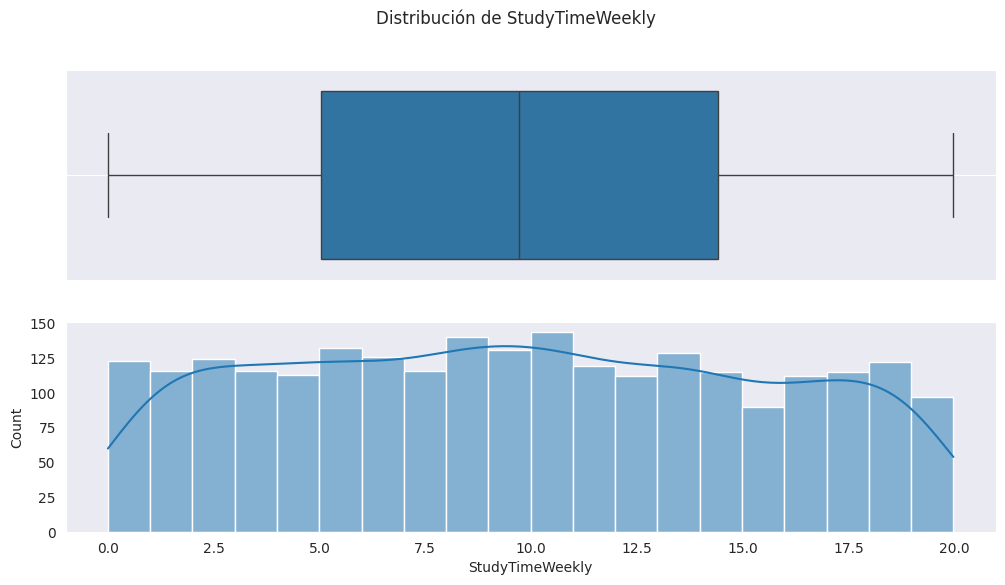

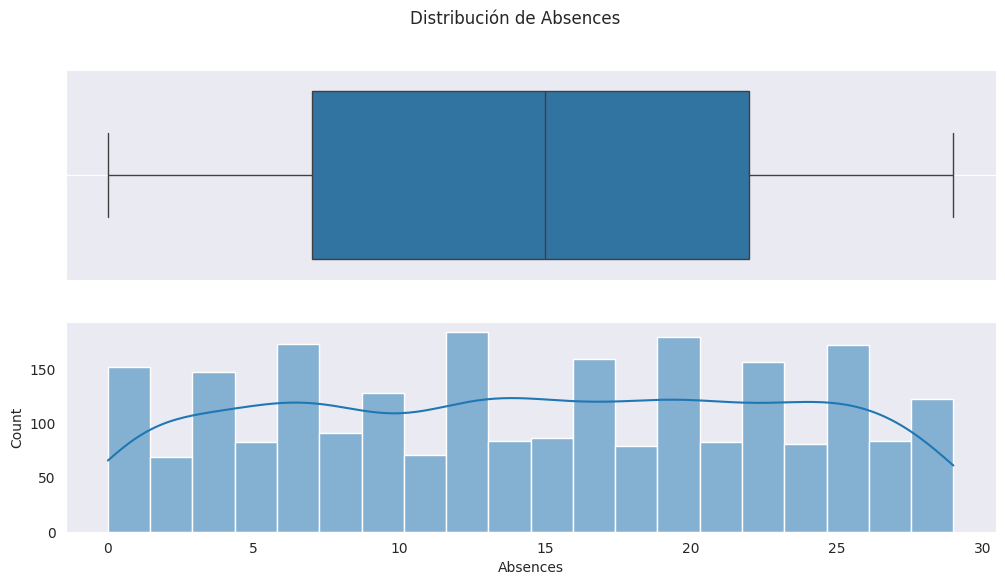

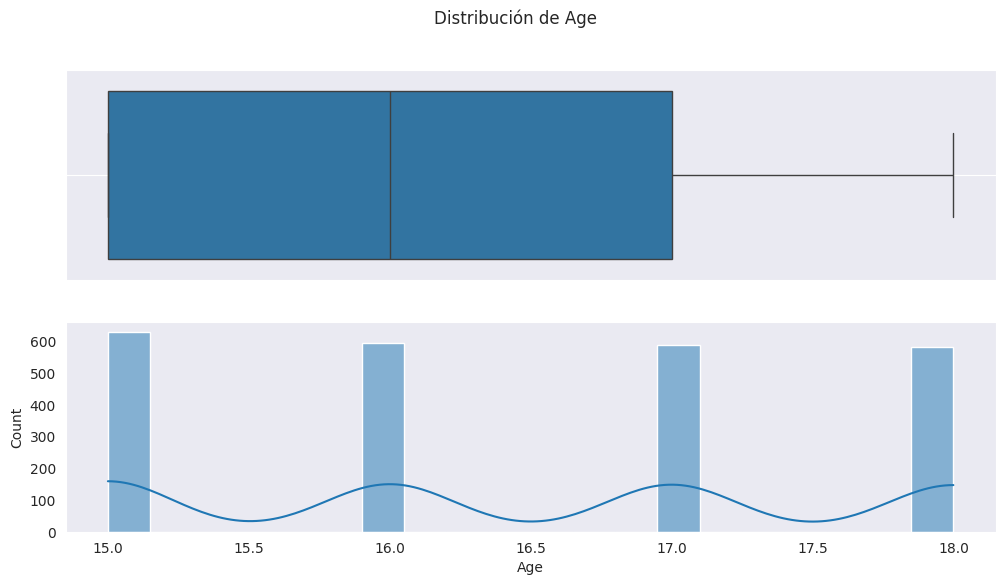

In [ ]:
for _, feature in enumerate(NumVar):
    fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    fig.suptitle(f'Distribución de {feature}')
    sns.boxplot(x = df[feature], ax = axes[0])
    sns.histplot(x = df[feature], ax = axes[1],kde=True, bins=20)
    axes[0].grid()
    axes[1].grid()
    plt.xlabel(feature)
    plt.show()

In [ ]:
for variable in NumVar:
    print(f"Estadísticas descriptivas para {variable}:")
    print(stats.describe(df[variable]))
    print("-" * 30)  # Separador entre variables

Estadísticas descriptivas para StudyTimeWeekly:
DescribeResult(nobs=2392, minmax=(0.001056538645936, 19.97809399526153), mean=9.771991919431738, variance=31.953856561605583, skewness=0.050036669884928095, kurtosis=-1.1358169615994715)
------------------------------
Estadísticas descriptivas para Absences:
DescribeResult(nobs=2392, minmax=(0, 29), mean=14.54138795986622, variance=71.69715708572699, skewness=-0.02600077249756051, kurtosis=-1.1762755655561952)
------------------------------
Estadísticas descriptivas para Age:
DescribeResult(nobs=2392, minmax=(15, 18), mean=16.468645484949832, variance=1.262922798565971, skewness=0.03577097473505741, kurtosis=-1.371740386570325)
------------------------------


Podemos observar la ausencia de outliers en las variables. Tanto el tiempo de estudio como las ausencias poseen simetría en las distribuciones, pero presentan kurtosis platicúrtica. Si bien segun el coeficiente de variación segun Martinez 2007, serían heterogéneas, ya que vemos como los datos se distribuyen por todo el rango y no más cercano a la media. Las ausencias presentan más variaciones a lo largo del rango de la variable.
Podría decirse que presentan distribución uniforme.

**DUDA** que implicancia tiene para el posterior análisis?

En cuanto a la variable edad, el gráfico podría mejorarse, solo observamos que tenemos alumnos de solo 4 edades.

### Distribución de Variables Categóricas

In [ ]:
#Modificamos las variables 'int' a 'category' creando un segundo dataset, para poder realizar la exploración de las categorías.
df2 = df.copy()
df2['Gender'] = df['Gender'].astype('category')
df2['Ethnicity'] = df['Ethnicity'].astype('category')
df2['ParentalEducation'] = df['ParentalEducation'].astype('category')
df2['Tutoring'] = df['Tutoring'].astype('category')
df2['ParentalSupport'] = df['ParentalSupport'].astype('category')
df2['Extracurricular'] = df['Extracurricular'].astype('category')
df2['Sports'] = df['Sports'].astype('category')
df2['Music'] = df['Music'].astype('category')
df2['Volunteering'] = df['Volunteering'].astype('category')
print(df2.dtypes)

Age                        int64
Gender                  category
Ethnicity               category
ParentalEducation       category
StudyTimeWeekly          float64
Absences                   int64
Tutoring                category
ParentalSupport         category
Extracurricular         category
Sports                  category
Music                   category
Volunteering            category
GradeClass               float64
TotalExtracurricular       int64
dtype: object


In [ ]:
df2.describe(include='category')

,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
count,2392,2392,2392,2392,2392,2392,2392,2392,2392
unique,2,4,5,2,5,2,2,2,2
top,1,0,2,0,2,0,0,0,0
freq,1222,1207,934,1671,740,1475,1666,1921,2016


Acá podemos observar un resumen para las variables categóricas.
De todos los alumnos, el género más frecuente es el femenino y de origen caucásico.
En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.
En caunto a los alumnos, la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.

In [ ]:
# Variables Categóricas
CatVar = ['Ethnicity', 'ParentalEducation','ParentalSupport']
BinVar = ['Extracurricular','Sports','Music','Volunteering','Gender','Tutoring',]
# Colocamos los nombres de las categorías
Etiquetas = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Female', 'Male'],
    'Tutoring': ['No', 'Yes'],
}

#### DUDA acá tuve que cambiar el orden de gender y poner Femenino primero porque me ponia la etiqueta
####  en el lado incorrecto del grafico(minoria). no supe como solucionarlo.

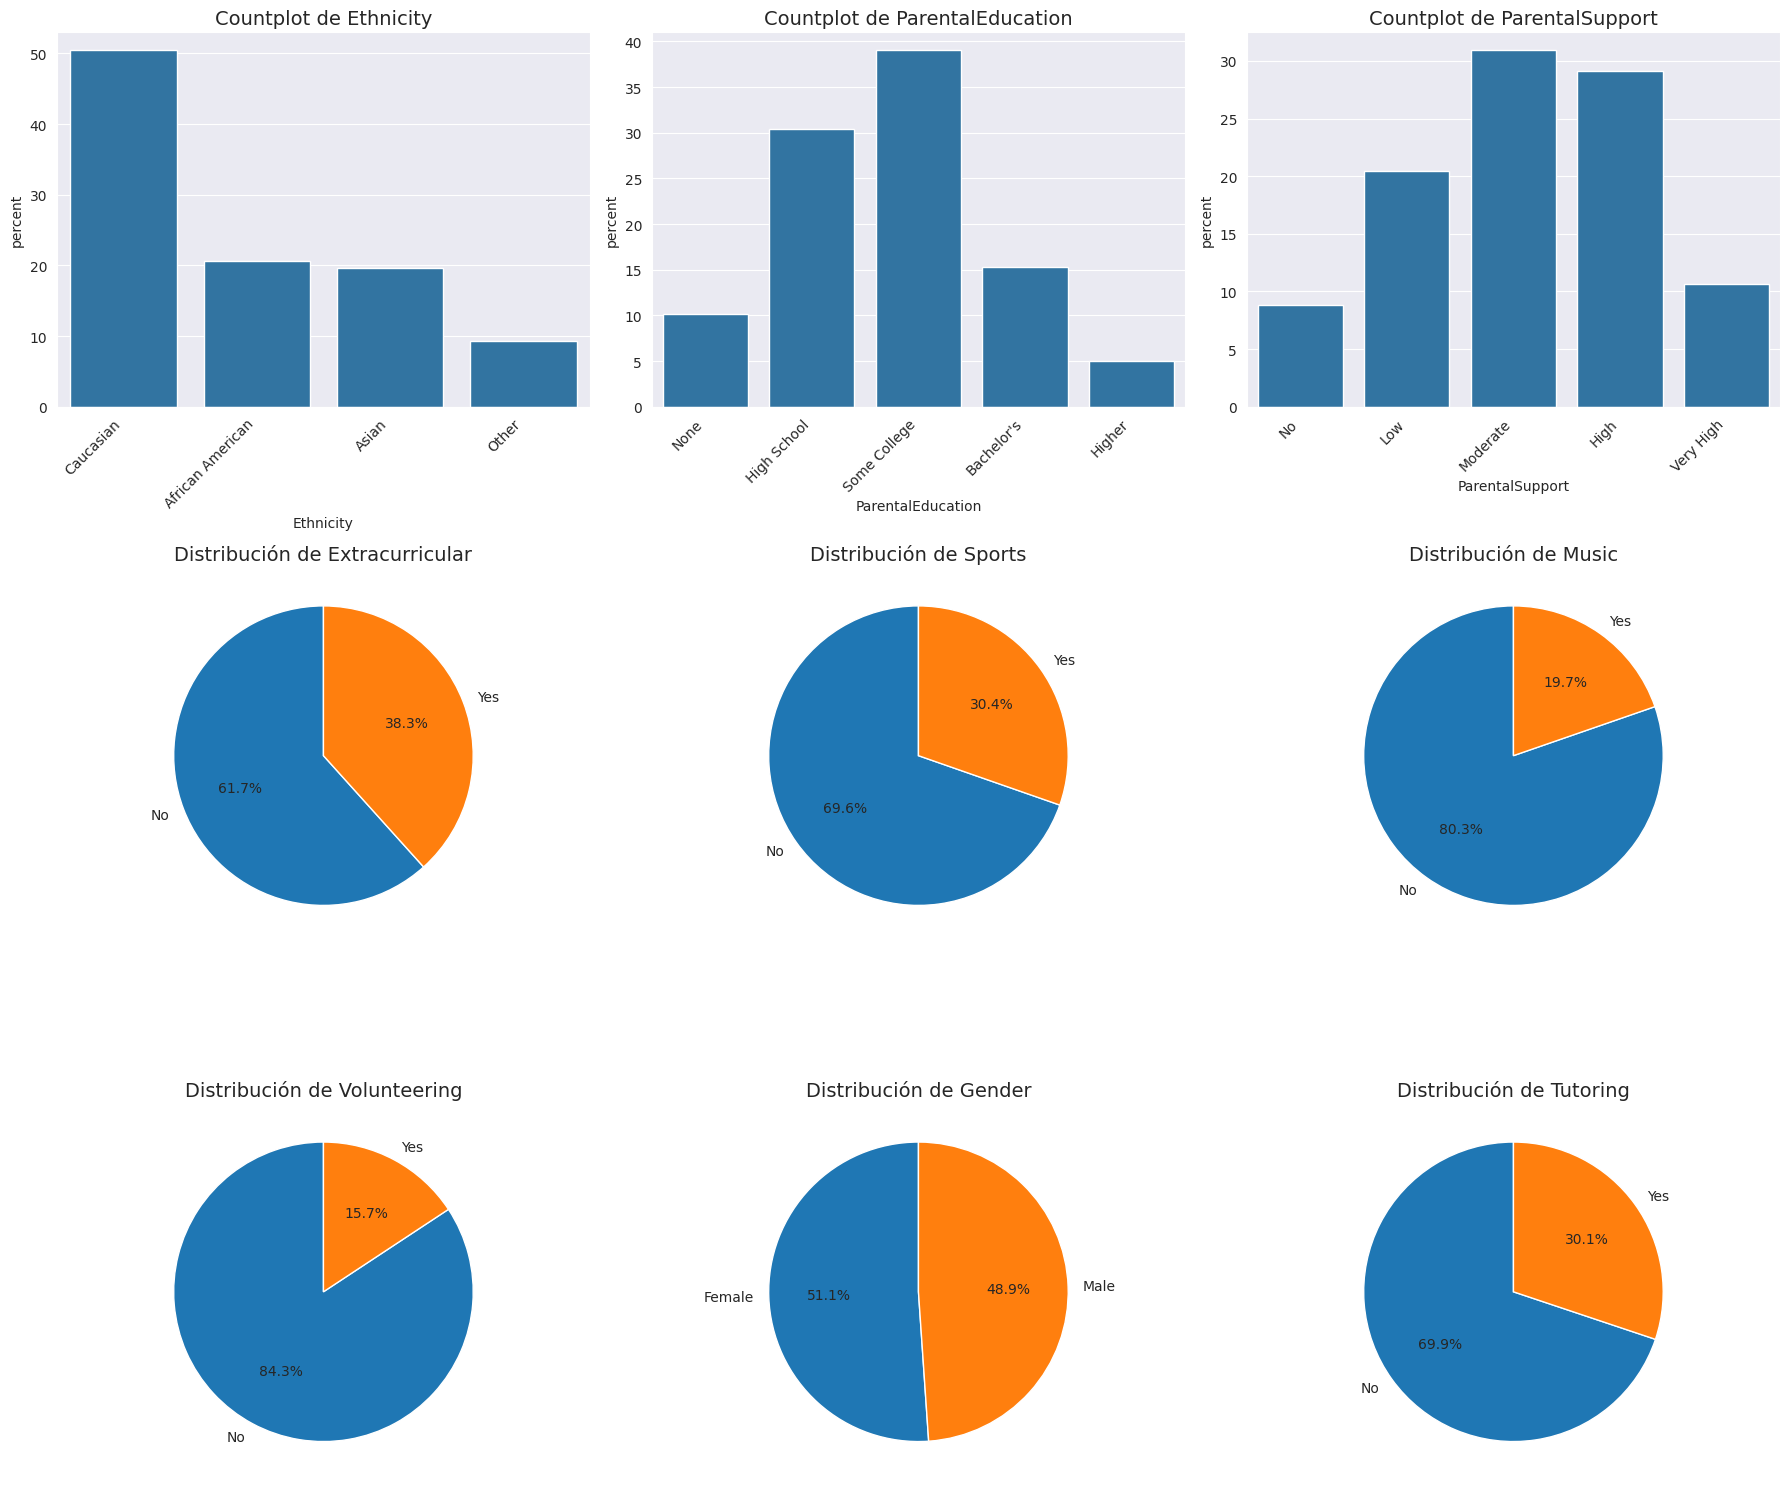

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, column in enumerate(CatVar[:3]):
    row = i // 3  #aca con l ayuda de gemini e internet porque no podia hacer la cuadricula junto con el for.
    col = i % 3
    sns.countplot(data=df, x=column, stat='percent', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot de {column}', fontsize=14)
    labels = Etiquetas.get(column, [])
    ticks = range(len(labels))
    axes[row, col].set_xticks(ticks)
    axes[row, col].set_xticklabels(labels, rotation=45, ha='right')

for i, column in enumerate(BinVar):
    row = (i + 3) // 3
    col = (i + 3) % 3
    frecuencias = df[column].value_counts()
    axes[row, col].pie(frecuencias, labels=Etiquetas.get(column, []), autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Distribución de {column}', fontsize=14)

plt.tight_layout()
plt.show()

Respecto al ámbito familiar de los almunos, la mayoria de los padres han terminado la secundaria o han comenzado la universidad, mientras que en cuanto al apoyo que brindan a nivel escolar la mayoria es de moderado a alto.

La etnicidad mayor representada es la caucásica.

La gran mayoria de los alumnos no participa de ninguna actividad extracurricular, ni en musica o deportes.

La variable género se encuentra balanceada. Mientras que el resto presenta un desbalance alto.

DUDA: en este caso, es necesario realizar alguna acción sobre las variables no balanceadas? o influye en un futuro análisis?

### Distribución de la Variable Target

In [ ]:
#Exploremos la variable target
print(df['GradeClass'].describe())

count    2392.000000
mean        2.983696
std         1.233908
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: GradeClass, dtype: float64


DescribeResult(nobs=2392, minmax=(0.0, 4.0), mean=2.983695652173913, variance=1.522527867183096, skewness=-0.900242251313216, kurtosis=-0.4182476631355172)

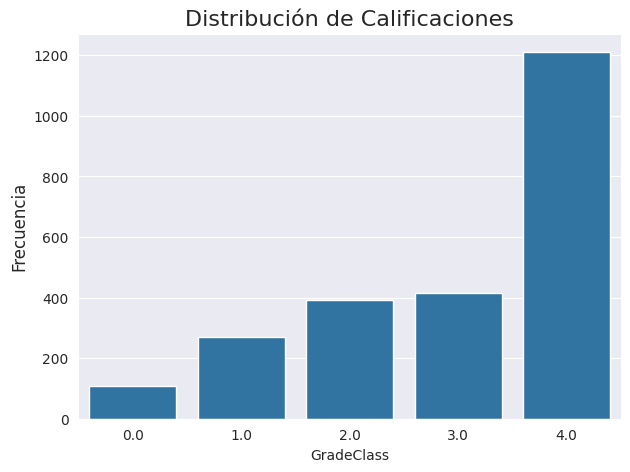

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.countplot(df, x='GradeClass',stat="count")
plt.title('Distribución de Calificaciones', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
stats.describe(df.GradeClass)

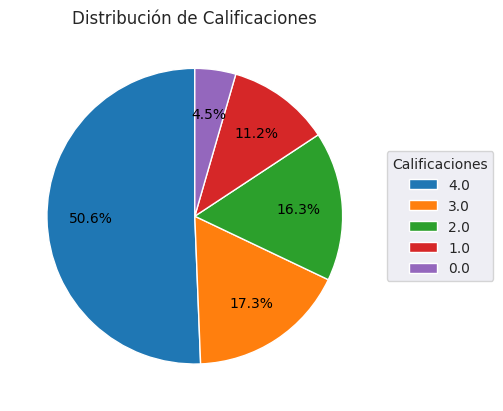

In [ ]:
conteo_calificaciones = df['GradeClass'].value_counts()
plt.pie(conteo_calificaciones, labels=None, autopct='%1.1f%%', startangle=90,
        pctdistance=0.7, textprops={'fontsize': 10, 'color': 'black'})
plt.title('Distribución de Calificaciones')
plt.legend(conteo_calificaciones.index, title='Calificaciones', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que el 50% de los alumnos obtienen la clasificación más baja, mientras que el resto de las notas se asignan a menos del 20% de los alumnos cada una. Solo un 5% obtiene las mejores clasificaciones (0).
Podemos decir que la variable target no posee distribución normal, y presenta asimetría moderada (-0.90) a alta hacia la izquierda o negativa.

In [ ]:
# Realizo el test de Shapiro para evaluar normalidad en la variable respuesta
p_value = stats.shapiro(df.GradeClass)

print("Valor p:", p_value[1])
nivel_significancia = 0.05
if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 9.429434016975867e-49
Los datos no siguen una distribución normal.


## Análisis Bivariado

###Evaluamos la correlacion de las variables vs la variable target

Correlaciones con coeficiente Pearson GradeClass         1.00
Absences           0.73
StudyTimeWeekly   -0.13
Age               -0.01
Name: GradeClass, dtype: float64
--------------------------------------------------
Correlaciones con coeficiente Spearman GradeClass         1.00
Absences           0.77
StudyTimeWeekly   -0.13
Age               -0.01
Name: GradeClass, dtype: float64


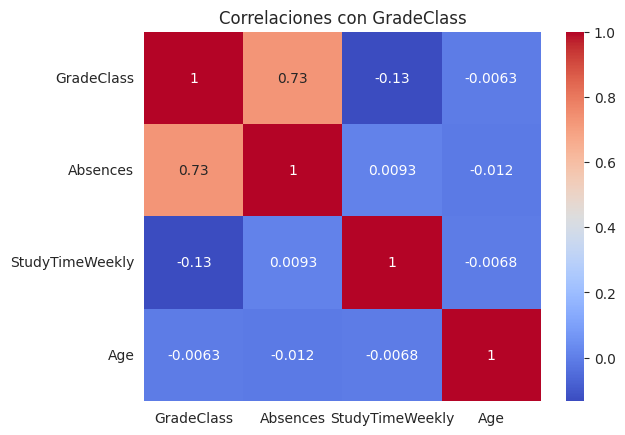

In [ ]:
corPearson = df[['GradeClass', 'Absences', 'StudyTimeWeekly','Age']].corr()
corSpearman = df[['GradeClass', 'Absences', 'StudyTimeWeekly','Age']].corr(method='spearman')
print("Correlaciones con coeficiente Pearson", corPearson['GradeClass'].round(2))
print("-" * 50)
print("Correlaciones con coeficiente Spearman",corSpearman['GradeClass'].round(2))


# mapa de calor
sns.heatmap(corPearson, annot=True, cmap='coolwarm')
plt.title('Correlaciones con GradeClass')
plt.show()

Podemos observar una alta correlación entre la calificación obtenida y la cantidad de días ausentes (0.73).
Las correlacionde de GradeClass con el resto de variables cuantitativas son bajas.
Si probamos con el coeficiente de Spearman, vemos que ese valor es levemente mayor. Podrá ser una relación no lineal entre esta variable y la variable target.

In [ ]:
#Probamos esa correlación con otra librería para obtener también un nivel de significancia.
coeficiente, p_valor = stats.spearmanr(df["GradeClass"], df["Absences"])

# Imprimir el coeficiente de Spearman y el p-valor
print("Coeficiente de Spearman:", coeficiente)
print("P-valor: {:.15f}".format(p_valor))  # Imprime con más decimales


Coeficiente de Spearman: 0.7682788659905345
P-valor: 0.000000000000000


El valor p es menor a 0.05, rechazamos la hipótesis nula y podemos decir que existe una correlación significativa.

**DUDA** me resulta sospechoso un valor p igual a 0. aunque lo muestre con más decimales.

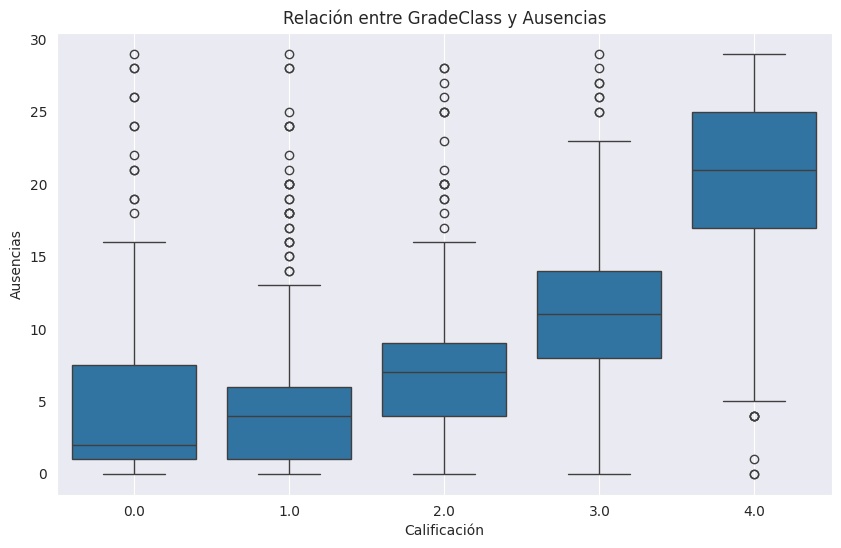

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(x='GradeClass', y='Absences', data=df, ax=axes)
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Ausencias')
plt.title('Relación entre GradeClass y Ausencias')
plt.show()

Acá podemos observar como los alumnos con calificaciones más bajas (4) en general son quienes más días se ausentan.

In [ ]:
# Calcular el coeficiente de correlación para las variables binarias vs target con el coef. punto biserial
for variable in BinVar:
    coeficiente, p_valor = pointbiserialr(df[variable], df['GradeClass'])
    print(f"Correlación entre {variable} y GradeClass:")
    print(f"Coeficiente: {coeficiente:.2f}")
    print(f"Valor p: {p_valor:.3f}")
    print("-" * 30)

Correlación entre Extracurricular y GradeClass:
Coeficiente: -0.07
Valor p: 0.001
------------------------------
Correlación entre Sports y GradeClass:
Coeficiente: -0.03
Valor p: 0.193
------------------------------
Correlación entre Music y GradeClass:
Coeficiente: -0.04
Valor p: 0.078
------------------------------
Correlación entre Volunteering y GradeClass:
Coeficiente: 0.01
Valor p: 0.520
------------------------------
Correlación entre Gender y GradeClass:
Coeficiente: 0.02
Valor p: 0.261
------------------------------
Correlación entre Tutoring y GradeClass:
Coeficiente: -0.11
Valor p: 0.000
------------------------------


Mediante este coeficiente podemos evaluar que no existe correlación entre nuestra variable target y las variables binarias del dataset.
Podemos explorar si hay alguna relación entre estas y las ausencias por ejemplo, que si se correlacionaban con la variable target.

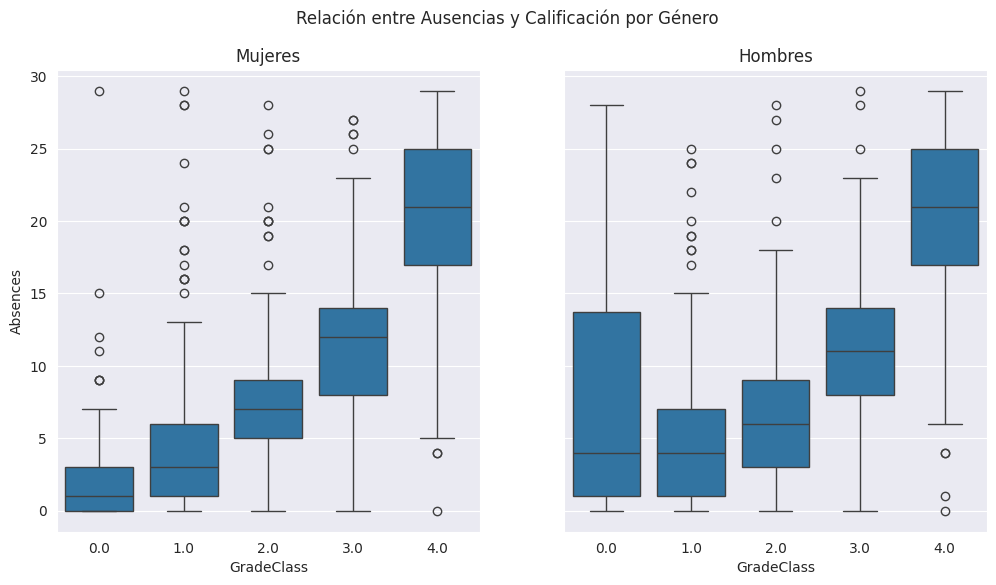

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxplot(x='GradeClass', y='Absences', data=df[df['Gender'] == 1], ax=axes[0])
axes[0].set_title('Mujeres')

sns.boxplot(x='GradeClass', y='Absences', data=df[df['Gender'] == 0], ax=axes[1])
axes[1].set_title('Hombres')

plt.suptitle('Relación entre Ausencias y Calificación por Género')
plt.show()

En este gráfico podemos observar la relación entre las calificaciones obtenidad y las ausencias, diferenciado por género.

Si bien para ambos siguen el mismo patrón, hay una leve diferencia en la mediana para los hombres con mejores calificaciones, que parecen tener más ausencias pero logran buenas calificaciones de igual manera.

<Figure size 700x500 with 0 Axes>

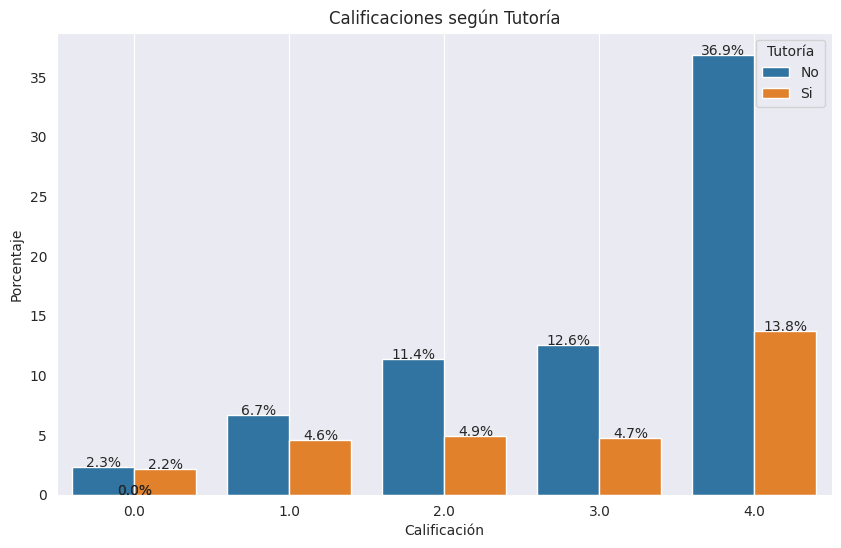

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.countplot(df, x='GradeClass', hue='Tutoring', stat="percent", hue_order=[0, 1])
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Porcentaje')
plt.title('Calificaciones según Tutoría')
plt.legend(title='Tutoría', labels=['No', 'Si'])

# Agregar valores encima de cada barra con ayuda gemini
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            '{:.1f}%'.format(height), ha="center")

plt.show()

Podemos observar que gran porcentaje de los alumnos con calificaciones más bajas no recibe tutoría, indicando la importancia de esta práctica para el rendimiento académico.

**DUDA** Acá nose como compararí si esas diferencias son significativas.

###Evaluamos las relaciones entre las demás variables.

<Figure size 700x500 with 0 Axes>

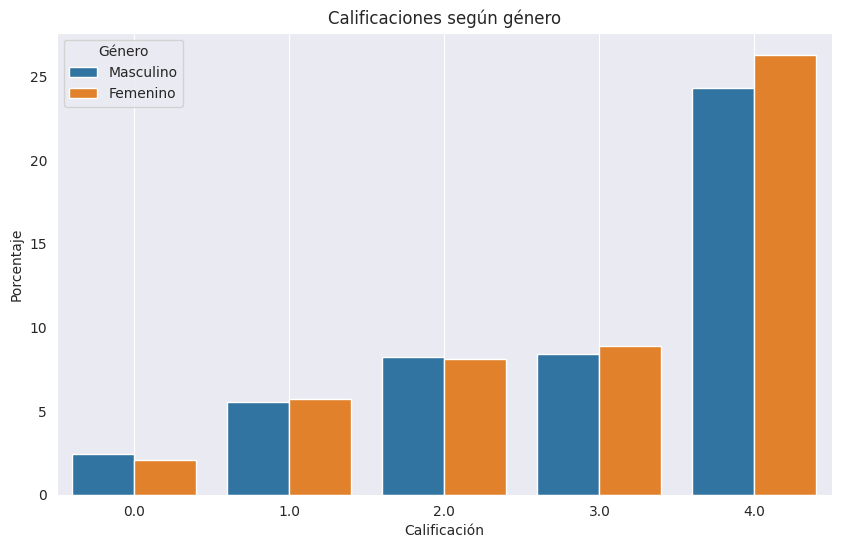

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(df, x='GradeClass', hue='Gender', stat="percent", hue_order=[0, 1])
axes.grid()
plt.xlabel('Calificación')
plt.ylabel('Porcentaje')
plt.title('Calificaciones según género')
plt.legend(title='Género', labels=['Masculino', 'Femenino'])
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df['GradeClass'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Valor de chi-cuadrado: 1.9153728454653411
Valor p: 0.7513204328843887


No se evidencia relación gráfica o estadística entre las calificaciones obtenidas por los alumnos y su género.

In [ ]:
#Para las demás variables con ayuda de gemini

from scipy.stats import ttest_ind, mannwhitneyu

for variable in BinVar:
    grupo_0 = df[df[variable] == 0]['Absences']
    grupo_1 = df[df[variable] == 1]['Absences']

    # Prueba t de Student (asumiendo normalidad)
    t_statistic, p_value_t = ttest_ind(grupo_0, grupo_1)
    print(f"Prueba t para la variable {variable}:")
    print(f"Estadística t: {t_statistic:.2f}")
    print(f"Valor p: {p_value_t:.3f}")

Prueba t para la variable Extracurricular:
Estadística t: -0.02
Valor p: 0.986
Prueba t para la variable Sports:
Estadística t: -2.03
Valor p: 0.043
Prueba t para la variable Music:
Estadística t: 0.42
Valor p: 0.671
Prueba t para la variable Volunteering:
Estadística t: 0.91
Valor p: 0.365
Prueba t para la variable Gender:
Estadística t: -1.05
Valor p: 0.294
Prueba t para la variable Tutoring:
Estadística t: 0.76
Valor p: 0.448


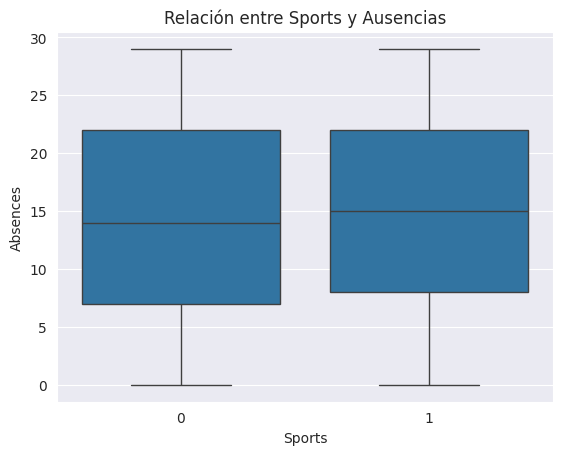

In [ ]:
    plt.figure()
    sns.boxplot(x='Sports', y='Absences', data=df)
    plt.title(f"Relación entre Sports y Ausencias")
    plt.show()

Observamos que habría una leve diferencia entre la cantidad de ausencias para quienes realizan deportes vs los que no.
Podemos evaluarlo comparando las medias mediante el estadístico t de Student, previo chequeo de normalidad.


In [ ]:
# Realizar la prueba de normalidad Shapiro-Wilk
estadistico, p_valor = stats.shapiro(df[df[variable] == 0]['Absences'])

# Imprimir el estadístico de la prueba y el p-valor
print("Estadístico de la prueba:", estadistico)
print("P-valor:", p_valor)

Estadístico de la prueba: 0.9547667863071984
P-valor: 2.469389942590358e-22


No procedo a evaluar la diferencia entre las medias dado que no se cumple el supuesto de normalidad.

**DUDA** creo que este era un procedimiento válido si uno quiere evaluar si hay diferencia en la cantidad de ausencias entre quienes practican deporte, dado que las ausencias se encontraba correlacionada con la calificación obtenida. Pero nose si termino de comprender porque no da normal. entiendo es por el tipo de variable que es discreta, en este caso habría que realizar otros test equivalentes a shapiro y posterior t student?

#Conclusiones

En el análisis univariado observamos que la edad se encuentra balanceada con casi la misma cantidad de alumanos de 15 a 18 años, y que el tiempo de estudio y la asistencia a clase presentan distribuciones uniformes.

La etnicidad más representada es la caucásica.

Por otro lado, de las variables categóricas, el género más frecuente es el femenino, aunque está variabla se encuentra balanceada; no así el resto.

Los alumnos la mayoria no cuenta con tutoría y no participa en ninguna actividad extracurricular.

En cuanto al entorno del alumno, lo más frecuente es que los padres hayan iniciado pero no terminado la universidad y den un nivel de apoyo moderado a los alumnos.

Respecto de la distribución de las calificaciones, se exploró la variable GradeClass y se observó que la mayoría de los estudiantes obtienen calificaciones bajas. Esto podría indicar la necesidad de investigar las causas de este bajo rendimiento y diseñar estrategias para mejorar el aprendizaje.

Además, en la exploración bivariadas la única variable que presento una alta correlación con nuestra variable target fue las ausencias a clases, asociando mayor ausencias con calificaciones más bajas. Mientras que las correlaciones con el resto de las variables fueron bajas.

También podemos observar algún tipo de relación de nuestra variable target y la presencia de tutorías, con mayor importancia en aquellso alumnos con bajas calificaciones.

Esta primera exploración no da una idea de las variables que resultan de interés al momento de modelar y clasificar el desempeño de los estudiantes, entre ellas la ausencia a clases y la presencia de tutoria.



